In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import os
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
# Verifica a pasta corrente
pasta = os.getcwd()

In [3]:
# Junta caminho corrente + pasta com os arquivos "ambos", "homens", "mulheres"
pasta_ambos = os.path.join(pasta, "dados", "ambos")
pasta_mulheres = os.path.join(pasta, "dados", "mulheres")
pasta_homens = os.path.join(pasta, "dados", "homens")

In [4]:
# Lista arquivos das pastas
arquivos_ambos = os.listdir(pasta_ambos)
arquivos_mulheres = os.listdir(pasta_mulheres)
arquivos_homens = os.listdir(pasta_homens)

In [5]:
# Lista os arquivos somente excel e que comecem com 'ambos', 'homens', 'mulheres'
arq_ambos_xls = [arq_ambos for arq_ambos in arquivos_ambos if arq_ambos[-3:]=='xls']
arq_mulher_xls = [arq_mulher for arq_mulher in arquivos_mulheres if arq_mulher[-3:]=='xls']
arq_homem_xls = [arq_homem for arq_homem in arquivos_homens if arq_homem[-3:]=='xls']

Obs.:
> Pula_linhas: Existe um modelo em todos os arquivos. Não imprimir algumas linhas
> assign(arq), para gravar o ano da tabela no dataframe
#### colunas:
1. x: idade da pessoa
2. qx_mil: probabilidade de morte entre duas idades exatas na idade x;
3. dx: número de mortos na idade x;
4. lx: número de vivos na idade x;
5. Lx: Pessoas vivas na metade da idade x;
6. Tx: Quantidade de existencia na idade x. Representa o somatório dos anos vividos pelas pessoas componentes de um grupo de idade x até o instante de sua extinção. Em outras palavras, é o acompanhamento, ano a ano, de um grupo até sua extinção;
7. Ex: Expectativa de vida na idade x.
8. qx: probabilidade de morte na idade x. corresponde qx_mil/1000

### Tratamento de inconsistencias na importação

In [6]:
# Pular linhas na leitura dos arquivos
pular_linhas1 = list(range(0,5)) + list(range(46,62)) + list(range(103,113))
pular_linhas2 = list(range(0,5)) + list(range(46,61)) + list(range(102,113))
pular_linhas3 = list(range(0,4)) + list(range(45,61)) + list(range(102,113))

In [7]:
colunas = ['x', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'Ex']

In [8]:
# Inicializa o dataframe vazio
df_mulher = pd.DataFrame()

# Dataframe mulher
for arq_mulher in arq_mulher_xls:
    ano = arq_mulher[-8:-4]
    if ano in ['1998', '1999']: 
        pular_linhas = pular_linhas2
    elif ano in ['2003']:
        pular_linhas = pular_linhas3
    else:
        pular_linhas = pular_linhas1
    dados=pd.read_excel(os.path.join(pasta_mulheres, arq_mulher),
                        names = colunas,
                        skiprows = pular_linhas,
                        usecols = "A:G").assign(Ano=ano)
    df_mulher = df_mulher.append(dados)

df_mulher.info()
# Tratamento da idade 80+ para os anos.
df_mulher.loc[80,'x'] = 80
# Aproveitar e corrigir o qx aos 80 anos de alguns arquivos
df_mulher.loc[80,'qx_mil'] = 1000.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 80
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1701 non-null   object 
 1   qx_mil  1701 non-null   float64
 2   dx      1701 non-null   float64
 3   lx      1701 non-null   float64
 4   Lx      1701 non-null   float64
 5   Tx      1701 non-null   float64
 6   Ex      1701 non-null   float64
 7   Ano     1701 non-null   object 
dtypes: float64(6), object(2)
memory usage: 119.6+ KB


In [9]:
# Inicializa o dataframe vazio
df_homem = pd.DataFrame()
# Dataframe ambos
pular_linhas1 = list(range(0,5)) + list(range(46,62)) + list(range(103,113))
pular_linhas2 = list(range(0,5)) + list(range(46,61)) + list(range(102,113))
colunas = ['x', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'Ex']

for arq_homem in arq_homem_xls:
    ano = arq_homem[-8:-4]
    if ano in ['1998', '1999']:
        pular_linhas = pular_linhas2
    else:
        pular_linhas = pular_linhas1
    
    dados=pd.read_excel(os.path.join(pasta_homens, arq_homem),
                        names = colunas,
                        skiprows = pular_linhas,
                        usecols = "A:G").assign(Ano=ano)
    df_homem = df_homem.append(dados)

df_homem.info()

# Tratamento da idade 80+ para os anos.
df_homem.loc[80,'x'] = 80
# Aproveitar e corrigir o qx aos 80 anos de alguns arquivos
df_homem.loc[80,'qx_mil'] = 1000.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 80
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1701 non-null   object 
 1   qx_mil  1701 non-null   float64
 2   dx      1701 non-null   float64
 3   lx      1701 non-null   float64
 4   Lx      1701 non-null   float64
 5   Tx      1701 non-null   float64
 6   Ex      1701 non-null   float64
 7   Ano     1701 non-null   object 
dtypes: float64(6), object(2)
memory usage: 119.6+ KB


In [10]:
# Inicializa o dataframe vazio
df_ambos = pd.DataFrame()
# Dataframe ambos
pular_linhas = list(range(0,5)) + list(range(46,62)) + list(range(103,113))
colunas = ['x', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'Ex']

for arq_ambos in arq_ambos_xls:
    ano = arq_ambos[-8:-4]
    dados=pd.read_excel(os.path.join(pasta_ambos, arq_ambos),
                        names = colunas,
                        skiprows = pular_linhas,
                        usecols = "A:G").assign(Ano=ano)
    df_ambos = df_ambos.append(dados)

df_ambos.info()

# Retirar sinais na idade 80 anos e colocar 80
# Tratamento da idade 80+ para os anos.
df_ambos[df_ambos['x'].astype(str).str.contains("80")].head()

# Tratamento da idade 80+ para os anos.
df_ambos.loc[80,'x'] = 80
# Aproveitar e corrigir o qx aos 80 anos de alguns arquivos
df_ambos.loc[80,'qx_mil'] = 1000.0

df_ambos[df_ambos['x'].astype(str).str.contains("80")].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 80
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1701 non-null   object 
 1   qx_mil  1701 non-null   float64
 2   dx      1701 non-null   float64
 3   lx      1701 non-null   float64
 4   Lx      1701 non-null   float64
 5   Tx      1701 non-null   float64
 6   Ex      1701 non-null   float64
 7   Ano     1701 non-null   object 
dtypes: float64(6), object(2)
memory usage: 119.6+ KB


,x,qx_mil,dx,lx,Lx,Tx,Ex,Ano
80,80,1000.0,41279.796194,41279.796194,385829.295210,385829.295210,9.346686,2005
80,80,1000.0,49775.834927,49775.834927,471431.778215,471431.778215,9.471097,2016
80,80,1000.0,50393.662136,50393.662136,481693.553297,481693.553297,9.558614,2017
80,80,1000.0,38688.000000,38688.000000,353052.000000,353052.000000,9.125620,2000
80,80,1000.0,47123.171679,47123.171679,428408.927006,428408.927006,9.091258,2012


In [11]:
#df_ambos_add = pd.DataFrame()
df_ambos_add = df_ambos[80:81]
df_ambos_add

,x,qx_mil,dx,lx,Lx,Tx,Ex,Ano
80,80,1000.0,41279.796194,41279.796194,385829.29521,385829.29521,9.346686,2005


In [12]:
# =============== GRAFICOS INICIO =====================
# Grafico de lx
# agrega os dataframes, identificando todos
frames = [df_mulher, df_homem, df_ambos]
df_agregado = pd.concat(frames, keys=['mulher', 'homem', 'ambos'], names=['sexo', 'IdLinha']).reset_index()
df_agregado = df_agregado.query("x != 80")
df_agregado['qx_prob'] = df_agregado['qx_mil']/1000.0
df_agregado.sort_values(by=['sexo', 'Ano'], inplace=True)

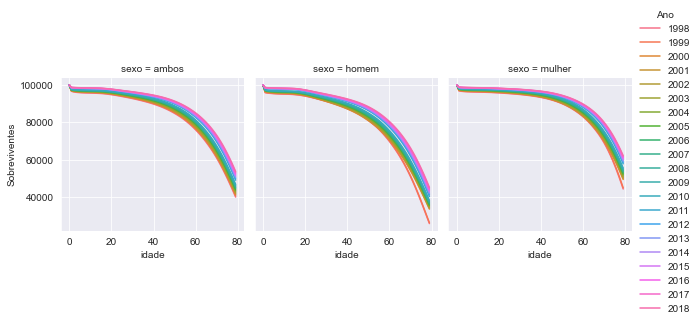

In [13]:
# grafico de sobreviventes - lx
sns.set_style("darkgrid")

graf = sns.FacetGrid(df_agregado, col="sexo", hue="Ano")
graf.map(sns.lineplot, "x", "lx")
graf.add_legend()
graf.set_xlabels("idade")
graf.set_ylabels("Sobreviventes")


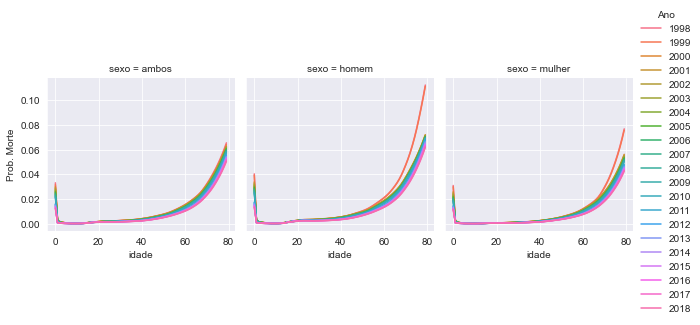

In [14]:
# grafico - probabilidade de morte
graf = sns.FacetGrid(df_agregado, col="sexo", hue="Ano")
graf.map(sns.lineplot, "x", "qx_prob")
graf.add_legend()
graf.set_xlabels("idade")
graf.set_ylabels("Prob. Morte")

[]

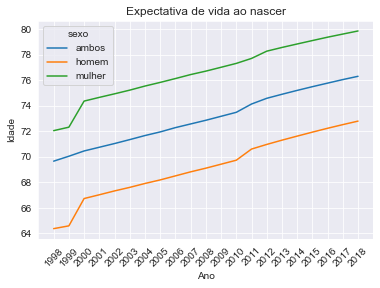

In [15]:
# Grafico de Expecativa de vida ao nascer
# Dataframe com x = 0
#sns.set() #reset o seaborn

df_agregado_0 = df_agregado.query("x == 0")
df_agregado_0.sort_values(by=['sexo', 'Ano'], inplace=True)
graf_0 = sns.lineplot('Ano', 'Ex', ci=None, data=df_agregado_0, hue="sexo")
graf_0.set_title("Expectativa de vida ao nascer")
graf_0.set_ylabel('Idade')
plt.xticks(rotation=45)
graf_0.plot()
# =============== GRAFICOS FIM =====================

In [16]:
# sorted --> subslistas classificadas pelo atributo "Ano" --> x[7]
df_to_lista = sorted(df_ambos.values.tolist(), key = lambda x: x[7])

In [17]:
# FUNÇÕES ATUARIAIS
def comutacao(FAj):
    qx_add = []
    qx_add_temp = []
    lx = []
    dx = []
    Lx = []
    Tx = []
    expx = []
    
    fx = 0.5
    #FAj = 100.0
    lx.append(100000.0)
    id_inicio = 0
    w = 120 # idade limite, onde não haverá vivos
    qx_add_temp.append(qx)
    qx_add = [*qx_add_temp[0]]
    
    for idade in range(id_inicio, 80):
        # primeiro passo
        dx.append(qx[idade]*lx[idade]/1000.0)  # dx = qx[idade]*lx[idade]/1000.0
        # segundo passo
        lx.append(lx[idade]-dx[idade])  # lx[idade+1] = lx[idade] - dx[idade]
    
    for idade in range(80, w):
        if lx[idade] != 0.0:
            # terceiro passo
            #lx[idade+2] = lx[idade+1]*(lx[idade+1]/(lx[idade]+FAj))
            lx.append(lx[idade]*(lx[idade]/(lx[idade-1]+FAj)))
        else:
            w = idade
            break        
    
    for idade in range(80, w):
        # quarto passo
        #dx[idade]=lx[idade]-lx[idade+1]
        dx.append(lx[idade]-lx[idade+1])
        # quinto passo
        # qx[idade] = dx[idade]/lx[idade]
        qx_add.append(dx[idade]/lx[idade]*1000.0)

    for idade in range(id_inicio, w):
        # sexto passo.
        # Lx[idade] = fx*lx[idade] + (1 - fx)*lx[idade+1]
        Lx.append(fx*lx[idade] + (1 - fx)*lx[idade+1])
    
    for idade in range(id_inicio, w):
        if lx[idade] != 0.0:
            # setimo passo
            # Tx = sum(Lx[idade:])
            Tx.append(sum(Lx[idade:]))
            # oitavo passo
            # exp = Tx[idade]/lx[idade]
            expx.append(Tx[idade]/lx[idade])
        else:
            break

    return idade, qx_add, dx, lx, Lx, Tx, expx

In [18]:
def comutacao_res(FAj):
    qx_add = []
    qx_add_temp = []
    lx = []
    dx = []
    Lx = []
    Tx = []
    expx = []
    
    fx = 0.5
    #FAj = 100.0
    lx.append(100000.0)
    id_inicio = 0
    w = 120 # idade limite, onde não haverá vivos
    qx_add_temp.append(qx)
    qx_add = [*qx_add_temp[0]]


    for idade in range(id_inicio, 80):
        # primeiro passo
        dx.append(qx[idade]*lx[idade]/1000.0)  # dx = qx[idade]*lx[idade]/1000.0
        # segundo passo
        lx.append(lx[idade]-dx[idade])  # lx[idade+1] = lx[idade] - dx[idade]
    
    for idade in range(80, w):
        if lx[idade] != 0.0:
            # terceiro passo
            #lx[idade+2] = lx[idade+1]*(lx[idade+1]/(lx[idade]+FAj))
            lx.append(lx[idade]*(lx[idade]/(lx[idade-1]+FAj)))
        else:
            w = idade
            break        
    
    for idade in range(80, w):
        # quarto passo
        #dx[idade]=lx[idade]-lx[idade+1]
        dx.append(lx[idade]-lx[idade+1])
        # quinto passo
        # qx[idade] = dx[idade]/lx[idade]
        qx_add.append(dx[idade]/lx[idade]*1000.0)

    for idade in range(id_inicio, w):
        # sexto passo.
        # Lx[idade] = fx*lx[idade] + (1 - fx)*lx[idade+1]
        Lx.append(fx*lx[idade] + (1 - fx)*lx[idade+1])
    
    for idade in range(id_inicio, w):
        if lx[idade] != 0.0:
            # setimo passo
            # Tx = sum(Lx[idade:])
            Tx.append(sum(Lx[idade:]))
            # oitavo passo
            # exp = Tx[idade]/lx[idade]
            expx.append(Tx[idade]/lx[idade])
        else:
            break

    erro = expx[79] - targetx
    return abs(erro)

In [19]:
# Função para unir as listas em linha
def unirSeries(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df.drop(explode, 1), how='left')

#### Interpolação para idades acima de 80 anos, inclusive.
##### Passos da Nota Técnica Atuarial sobre a Metodologia adotada pelo Ministério da Previdência Social na Extrapolação das Tábuas de Mortalidade IBGE para as idades acima de 80 anos
Fonte:https://www.example.com

In [20]:
dados = []
vetor_fatores = []
fatores_lista = []
vetor_dados = []
dados_lista = [] # np.empty((8,0)).tolist()
ano = 1997
inicio = 0
idade = []
ano_rept = []
w = []

for i in range(0,21): # Leitura de cada arquivo desde 1997
    ano += 1
    # intervalos de cada tabela de dados para cada ano
    fim = 81*(i+1)
    dados = df_to_lista[inicio:fim]
    inicio = fim
    FAj = 100.0
    
    # qx das tabelas do IBGE até 79 anos
    qx = [item[1] for item in dados][:-1]
    targetx = dados[79][6] # Expectativa de vida aos 80, na tabela do IBGE

    sol = optimize.minimize_scalar(comutacao_res) # , args=(FAj) se existissem mais outros parametros, usar args

    #sol.fun # erro / #sol.x # fator / #sol.sucess # sucesso /  #sol.nit # numero de iterações
    vetor_fatores = [str(ano), sol.x, sol.nit, sol.fun, sol.success]
    # aplicar append, pois é uma lista de uma lista de valores por vez
    fatores_lista.append(vetor_fatores) 
    # grava as features básicas da tábua de mortalidade
    x, qx_add, dx, lx, Lx, Tx, expx = comutacao(sol.x)
    w.append(x)
    
    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx_add, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lista.append(vetor_dados)

In [21]:
# Salva no Dataframel
w_max = max(w)
w_min = min(w)
# DataFrame dos fatores
df_fatores = pd.DataFrame(fatores_lista, columns=['ano', 'fator_ajuste', 'num_interacoes', 'erro', 'converge'])
print(df_fatores.head())
print(df_fatores.tail())

    ano  fator_ajuste  num_interacoes          erro  converge
0  1998    155.727751              24  4.857046e-09      True
1  1999    150.495103              21  8.019791e-09      True
2  2000    145.623480              22  7.490137e-09      True
3  2001    147.049430              24  2.547326e-09      True
4  2002    148.467122              23  9.924662e-09      True
     ano  fator_ajuste  num_interacoes          erro  converge
16  2014    231.170387              24  1.346395e-09      True
17  2015    231.595524              25  3.124615e-09      True
18  2016    232.170015              23  2.273838e-08      True
19  2017    232.729489              24  5.452311e-09      True
20  2018    233.212537              22  5.355172e-09      True


In [22]:
# Tratamento do DataFrame dos dados
features = ['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano']
# DataFrame base para forçar os dataframes de dados com o mesmo shape
df_formato = pd.DataFrame(np.empty(shape=(w_max+1,len(features))), columns= features)

In [23]:
# DataFrame dos dados
df_temp = pd.DataFrame(dados_lista, columns=features) # shape(21, 8)
df_unidos = unirSeries(df_temp,features) # shape(2421, 8)
# trecho do código para padronizar para as tabuas para o mesmo comprimento para o LSTM 
df_dados = pd.DataFrame()
for i in range(0,21):
    df_temp2 = df_unidos.loc[i].set_index('idade').reset_index().reindex_like(df_formato, method='ffill')
    df_dados = df_dados.append(df_temp2)
# com o uso do método ffill do reindex_like repete a última linha disponível, não será isso que queremos com a idade    
df_dados.drop(columns=['idade'], inplace=True) # shape(2457, 7)
# aproveitar o incremento do index para usar na feature 'idade'
df_dados = df_dados.reset_index()
df_dados.rename(columns={'index':'idade'}, inplace=True) # shape(2457, 8)

In [ ]:
#df_temp = pd.DataFrame(dados_lista, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
#df_dados = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
#df_dados = df_dados.reset_index(drop=True)

Text(0, 0.5, 'Sobreviventes')

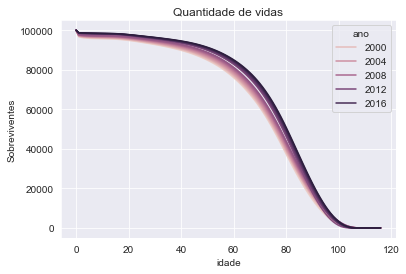

In [24]:
# ============== INICIO GRAFICOS =======================
# grafico de sobreviventes - lx
sns.set_style("darkgrid")
graf = sns.lineplot(data=df_dados, x="idade", y="lx", hue="ano")
graf.set_title("Quantidade de vidas")
#graf.set_xlabel("idade")
graf.set_ylabel("Sobreviventes")

Text(0, 0.5, 'Prob. Morte')

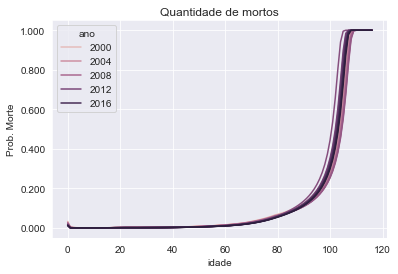

In [25]:
# grafico - probabilidade de morte
graf = sns.lineplot(data=df_dados, x="idade", y="qx_mil", hue="ano")
graf.set_title("Quantidade de mortos")
ylabels = ['{:,.3f}'.format(y) for y in graf.get_xticks()/100]
graf.set_yticklabels(ylabels)
graf.set_ylabel("Prob. Morte")

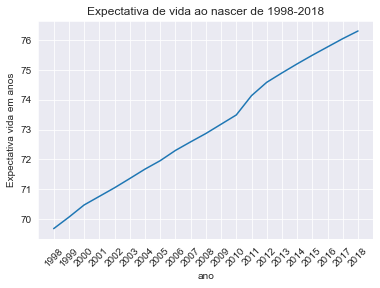

In [26]:
# Grafico de Expecativa de vida ao nascer
# Dataframe com x = 0
# eixo y:expectativa de vida ao nascer. idade=0. todos os anos (eixo x)

df_dadosx_0 = df_dados.query("idade == 0")
df_dadosx_0['ano'] = df_dadosx_0['ano'].astype(str)
graf_0 = sns.lineplot('ano', 'expx', ci=None, data=df_dadosx_0)
graf_0.set_title("Expectativa de vida ao nascer de 1998-2018")
graf_0.set_ylabel('Expectativa vida em anos')
plt.xticks(rotation=45)
plt.show()

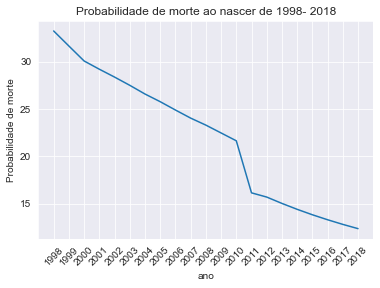

In [28]:
# verificar qx
df_dadosx_0 = df_dados.query("idade == 0")
df_dadosx_0['ano'] = df_dadosx_0['ano'].astype(str)
graf_0 = sns.lineplot('ano', 'qx_mil', ci=None, data=df_dadosx_0)
graf_0.set_title("Probabilidade de morte ao nascer de 1998- 2018")
graf_0.set_ylabel('Probabilidade de morte')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Gravar as saídas: Fatores e Dados
pasta_resultados = os.path.join(pasta, "resultados")
df_fatores.to_csv(pasta_resultados + '/' + 'df_fatores.csv')
df_dados.to_csv(pasta_resultados + '/' + 'df_dados.csv')

In [19]:
# SUGERE-SE APAGAR A PARTIR DAQUI
# Preparar o DataFrame para o LSTM
#lista_temp = df_temp.values
#lista_temp = df_temp.values.tolist()
#tamanho = [len(n) for n in lista_temp[)][1]] # tamanho de cada sublista
#menor = min(tamanho) # menor valor entre as sublistas
#df_lstm = df_dados[['ano','idade','qx_mil', 'lx']].copy()
# deletar as linhas onde idade >=113 (menor tamanho)
#indexNames = df_lstm[df_lstm['idade']>=113].index
#df_lstm.drop(indexNames, inplace=True)
#df_lstm = df_lstm.reset_index(drop=True)
#df_lstm['xt'] = df_lstm['ano'].astype(str) + '_' + df_lstm['idade'].astype(str)
#df_lstm['qx_prob'] = df_lstm['qx_mil']/1000.0

In [ ]:
# ====================== GRAFICO ========================
# # Gráfico temporal matplotlib. Seaborn demora muito a renderizar
#plt.style.use('seaborn-whitegrid')

#ax = plt.axes()
#ax.plot('xt','qx_prob', data=df_lstm)
#ax.set_title('Probabilidade de morte - Periodo 1999-2018')
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.set_xlabel('Ano_idade')
#ax.set_ylabel('Prob. Morte')
#ax.grid(True)